In [1]:
technique = 'dlpfc'
data_path = f"../data/{technique}"
root_save_path = f"../publish_weights/{technique}_iddouble"
device = "cuda:0"

In [2]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd


import sys
sys.path.append('..')
from src.interface import UnitedNet
from src.configs import *
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score


In [3]:
def split_data(test_batch):
    adata_rna_train = adata_rna_all[adata_rna_all.obs['batch'] != test_batch]
    adata_morph_train = adata_morph_all[adata_morph_all.obs['batch'] != test_batch]
    adata_mrna_niche_train = adata_mrna_niche_all[adata_mrna_niche_all.obs['batch'] != test_batch]

    adata_rna_test = adata_rna_all[adata_rna_all.obs['batch'] == test_batch]
    adata_morph_test = adata_morph_all[adata_morph_all.obs['batch'] == test_batch]
    adata_mrna_niche_test = adata_mrna_niche_all[adata_mrna_niche_all.obs['batch'] == test_batch]

    return [adata_rna_train, adata_morph_train, adata_mrna_niche_train], [adata_rna_test, adata_morph_test,
                                                                          adata_mrna_niche_test]


def concat_adatas(adatas_train, adatas_test):
    return [ad.concat([adata_train, adata_test]) for adata_train, adata_test in zip(adatas_train, adatas_test)]


def save_umap(adata_all,label,test_batch,nametype):
  fig,ax = plt.subplots(figsize=(6,4))
  ax=sc.pl.umap(adata_all,color=label, ax=ax,show=False)
  fig.savefig(root_save_path+f'/plot/{test_batch}_{nametype}_{label}.png',dpi=300)
  

def generate_adata(data, nonnan_indices, cell_type_label, cols, rows, batch):
    data = data.loc[data.index[nonnan_indices]]
    adata=ad.AnnData(X=np.array(data),obs=list(data.index))
    adata.obs['label']  = cell_type_label
    adata.obs['imagecol'] = cols
    adata.obs['imagerow'] = rows
    adata.obs['batch']  = batch
    return adata

# load input DLPFC data

In [5]:
adata_rna_all = sc.read_h5ad(f'../data/{technique}/adata_rna_all.h5ad')
adata_morph_all = sc.read_h5ad(f'../data/{technique}/adata_morph_all.h5ad')
adata_mrna_niche_all = sc.read_h5ad(f'../data/{technique}/adata_mrna_niche_all.h5ad')

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
test_batches=['151509','151507', '151508',  '151510' ,
    '151669', '151670', '151671', '151672' ,
    '151673', '151674', '151675', '151676' ]
for test_batch in test_batches:
    print(test_batch)
    adatas_train, adatas_test = split_data(test_batch)
    save_path = f"{root_save_path}/{test_batch}"

    model = UnitedNet(save_path, device=device, technique=dlpfc_config)
    model.train(adatas_train)
    model.transfer(adatas_train, adatas_test)

151509
training


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [34:32<00:00, 41.46s/it]


transferring


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [34:50<00:00, 41.82s/it]


151507
training


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [34:22<00:00, 41.25s/it]


transferring


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [34:58<00:00, 41.96s/it]


151508
training


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [35:41<00:00, 42.84s/it]


transferring


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [35:57<00:00, 43.15s/it]


151510
training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [35:47<00:00, 42.94s/it]


transferring


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [35:32<00:00, 42.65s/it]


151669
training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [36:06<00:00, 43.32s/it]


transferring


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [36:27<00:00, 43.75s/it]


151670
training


 20%|███████████████████████████████████▌                                                                                                                                              | 10/50 [07:13<28:53, 43.33s/it]

# Plot figures

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


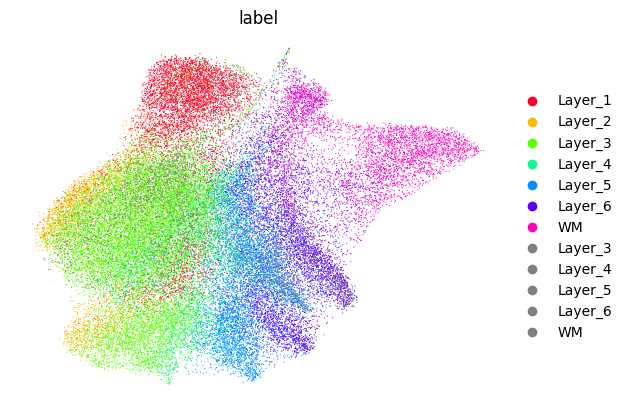

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


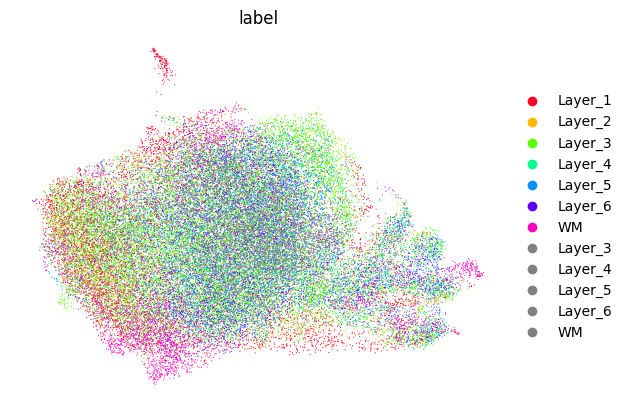

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


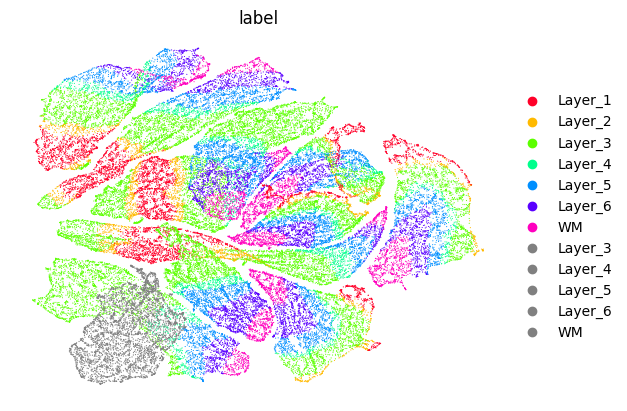

In [7]:
import matplotlib.pyplot as plt


test_batch='151670'
adatas_train, adatas_test = split_data(test_batch)
adatas_all = concat_adatas(adatas_train, adatas_test)

save_path = f"{root_save_path}/{test_batch}"


cmap_wt = plt.get_cmap('ocean')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
size_umap = 120000 / adatas_all[0].shape[0]


for mod_id in range(3):
    fig,ax=plt.subplots()
    sc.pp.neighbors(adatas_all[mod_id])
    sc.tl.umap(adatas_all[mod_id])
    ax = sc.pl.umap(adatas_all[mod_id][adatas_all[mod_id].obs['batch']!=test_batch],color=['label'],
                    size=size_umap,frameon = False,palette='gist_rainbow',ax=ax,show=False)
    

    sc.pl.umap(adatas_all[mod_id][adatas_all[mod_id].obs['batch']==test_batch], color=['label'],
               size=size_umap*1.2,frameon = True,palette=['grey'],ax=ax,
               )

Load model and plot fused codes

In [6]:
import matplotlib.pyplot as plt


test_batch='151670'
adatas_train, adatas_test = split_data(test_batch)
adatas_all = concat_adatas(adatas_train, adatas_test)

save_path = f"{root_save_path}/{test_batch}"

model = UnitedNet(save_path, device=device, technique=dlpfc_config)
model.load_model(f"{root_save_path}/{test_batch}/transfer_epoch_50.pt")

adatas = concat_adatas(adatas_train, adatas_test)
adata_all = model.infer(adatas)
adata_all.obs['batch'] = list(adatas[0].obs['batch'])
adata_all.obs['label'] = list(adatas[0].obs['label'])

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\_core\anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


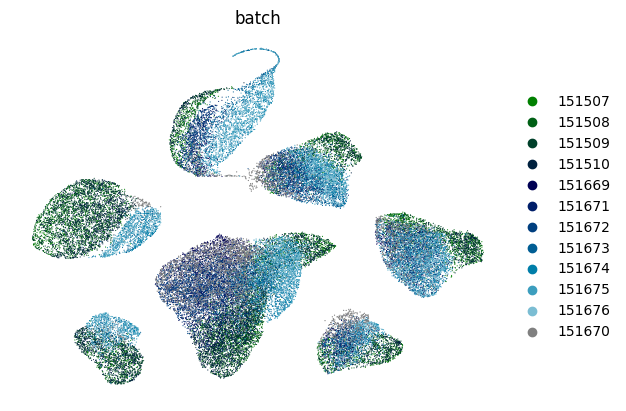

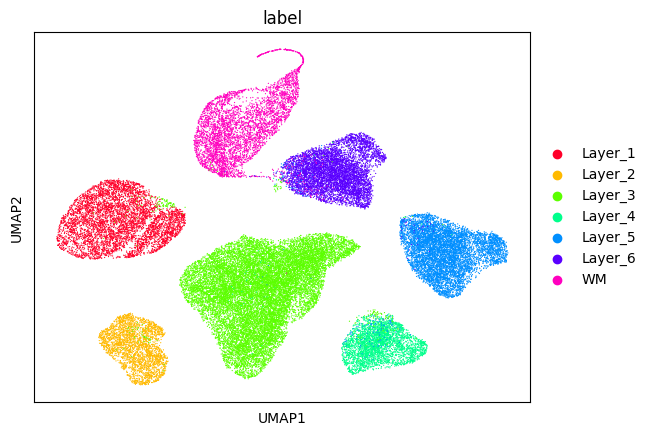

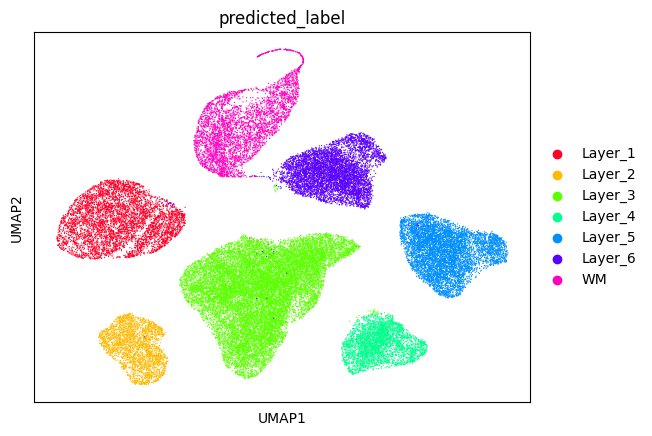

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


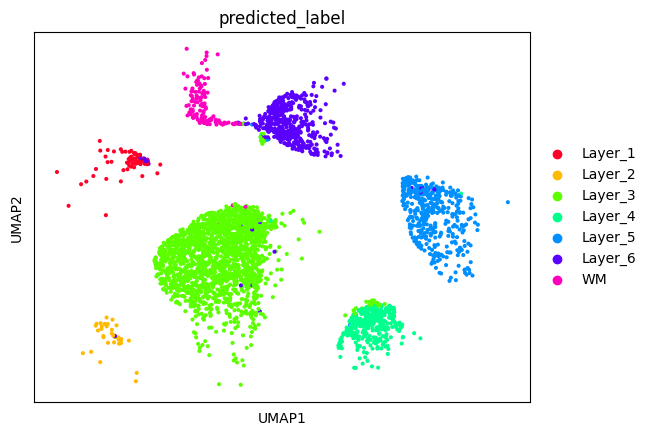

In [7]:

import matplotlib.pyplot as plt
cmap_wt = plt.get_cmap('ocean')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
size_umap = 120000 / adatas[0].shape[0]

fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'dlpfc_batch_label.pdf')

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_gt_label.pdf')

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_predict_label.pdf')
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'dlpfc_predict_label_test.pdf')

C:\Users\Harvard\.conda\envs\pytorch\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


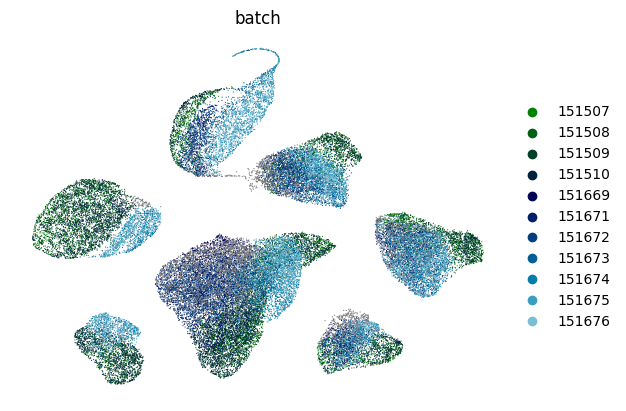

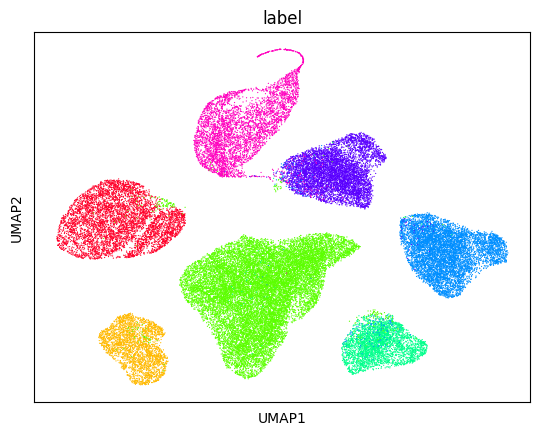

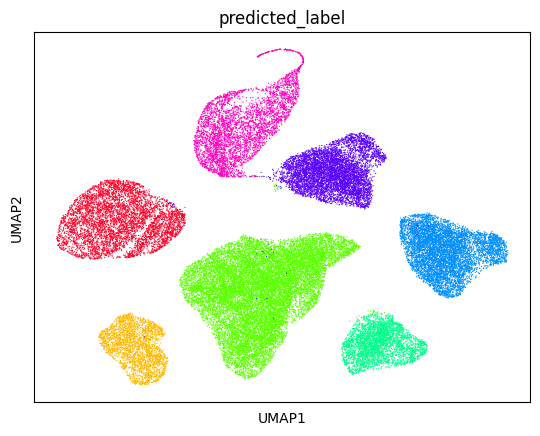

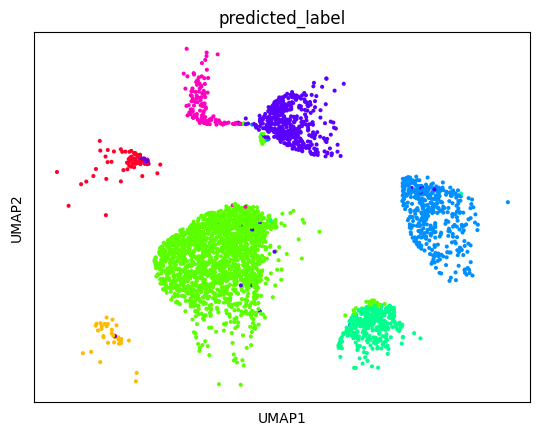

In [8]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1200

fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'dlpfc_batch_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_gt_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_predict_label.png',legend_loc =None)
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'dlpfc_predict_label_test.png',legend_loc =None)

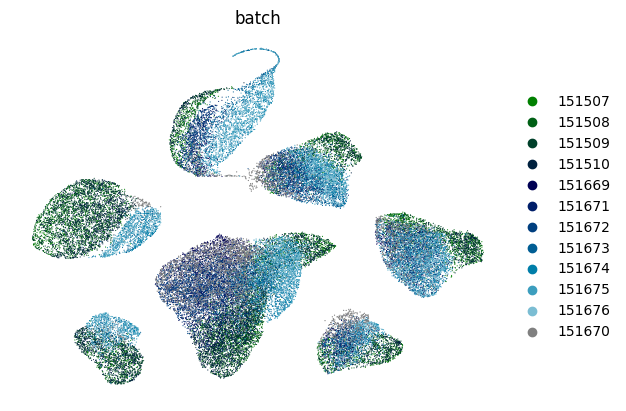

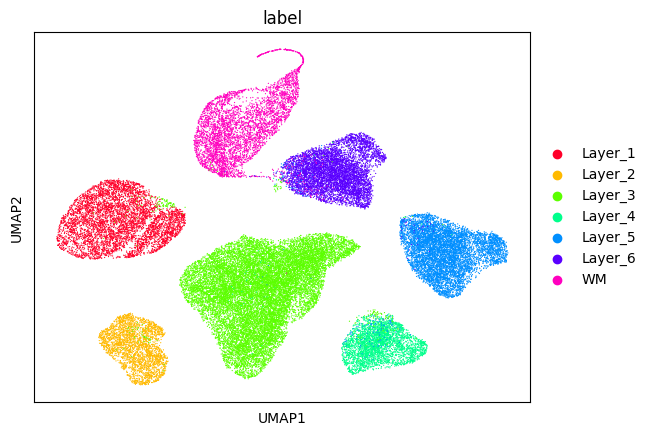

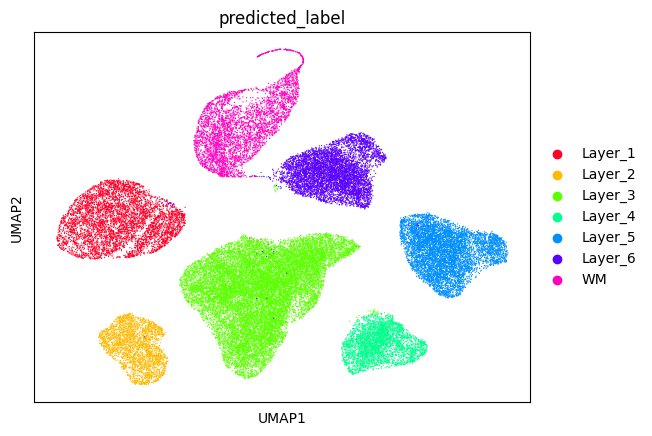

In [9]:

import matplotlib.pyplot as plt
cmap_wt = plt.get_cmap('ocean')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
size_umap = 120000 / adatas[0].shape[0]

fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'dlpfc_batch_label.pdf')

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_gt_label.pdf')

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_predict_label.pdf')

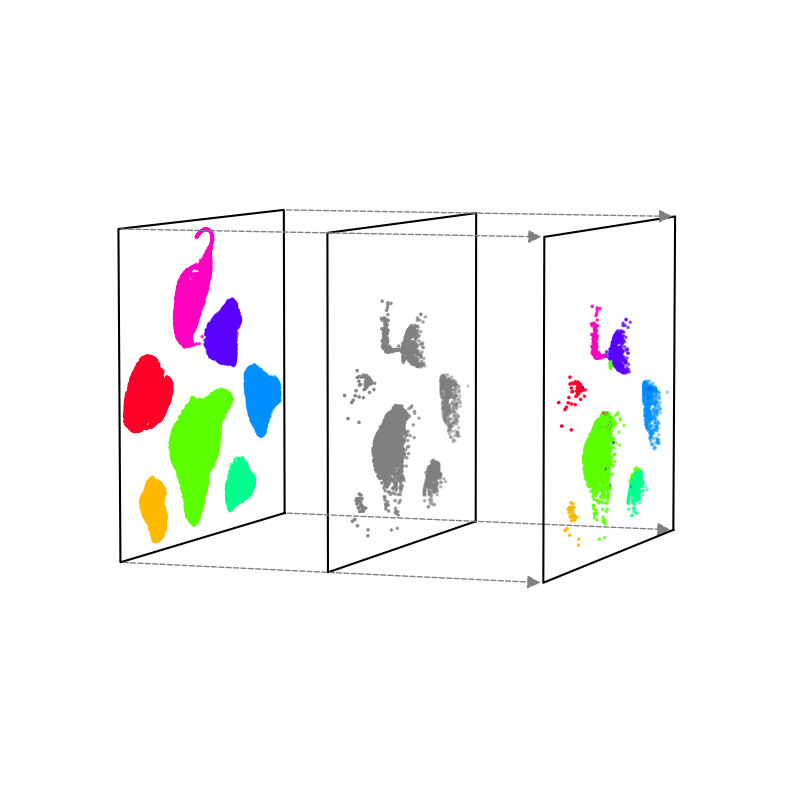

In [15]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
from matplotlib.colors import to_hex
type_cl_dict = {}
batch_name = test_batch
for x,y in zip(adata_all[adata_all.obs['batch']!=batch_name].obs['label'].astype('category').cat.categories,
               plt.get_cmap('gist_rainbow')(np.linspace(0, 1, len(adata_all.obs['label'].unique()))).tolist()):
    type_cl_dict[x] = to_hex(y)


new_cmap = adata_all[adata_all.obs['batch']!=batch_name].obs['label'].map(type_cl_dict).values
new_cmap_bct = adata_all[adata_all.obs['batch']==batch_name].obs['predicted_label'].map(type_cl_dict).values

size_umap = 120000 / adatas[0].shape[0]
                                                                                    
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection="3d")
np.random.seed(0)
ax.scatter3D(1, adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1], color=new_cmap,s=size_umap, zorder=1)
ax.scatter3D(2, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color='gray',s=size_umap, zorder=2)
ax.scatter3D(3, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color=new_cmap_bct,s=size_umap, zorder=3)
all_dots_x = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0]
all_dots_y = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1]
u_l = [all_dots_x.min()-1,all_dots_y.max()+1]
u_r = [all_dots_x.max()+1,all_dots_y.max()+1]
l_l = [all_dots_x.min()-1,all_dots_y.min()-1]
l_r = [all_dots_x.max()+1,all_dots_y.min()-1]

ax.plot3D([1,1,1,1,1],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=1)
ax.plot3D([2,2,2,2,2],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=2)
ax.plot3D([3,3,3,3,3],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=3)

ax.view_init(5, -70)
# poly = PolyCollection([[(-16,-13),(20,-13),(20,25),(-16,25)],[(-16,-13),(20,-13),(20,25),(-16,25)]], facecolors=['gray'], alpha=.5)
# ax.add_collection3d(poly, zs=[1,2], zdir='x')
# Hide grid lines
ax.grid(False)
plt.axis('off')
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# plt.xlim(-0.5,1.5)

for y,z in zip([l_r[0],l_l[0],u_l[0],u_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1]]):
  a = Arrow3D([1, 3], [y, y], 
              [z, z], mutation_scale=20, ls="dashed",
              lw=1, arrowstyle="-|>", color="grey")
  ax.add_artist(a)

plt.savefig('./figures/DLPFC_transfer_cell_type.png',dpi=800)
plt.show()

In [ ]:
F.softmax(model.model.fusers[0].weights, dim=0)
modality_weights = []
for cv in range(10):
    root_save_path = f"./saved_results/{technique}_{cv}_n"
    model = UnitedNet(root_save_path, device=device, technique=patchseq_config)
    model.load_model(f"{root_save_path}/train_best.pt")
    
    print(cv,cur_weight)



In [8]:
test_batches=['151509','151507', '151508',  '151510' ,
    '151669', '151670', '151671', '151672' ,
    '151673', '151674', '151675', '151676' ]
# root_save_path = f"../publish_weights/{technique}_iddouble"
root_save_path = f"../publish_weights/{technique}"

import torch.nn.functional as F
modality_weights = []
for test_batch in test_batches:
    adatas_train, adatas_test = split_data(test_batch)
    save_path = f"{root_save_path}/{test_batch}"
    model = UnitedNet(save_path, device=device, technique=dlpfc_all_config)
    model.load_model(f"{root_save_path}/{test_batch}/transfer_epoch_50.pt")
    cur_weight = F.softmax(model.model.fusers[model.model.best_head].weights, dim=0).detach().cpu().numpy()#np.mean([fs.weights.detach().cpu().numpy().mean(axis=0) for fs in model.model.fusers],axis=0)
    modality_weights.append(cur_weight)
    print(test_batch,cur_weight)
    
    

151509 [0.9170319  0.00909764 0.07387045]
151507 [0.10242906 0.8237132  0.07385772]
151508 [0.8537226  0.00741369 0.13886382]
151510 [0.7698006  0.13681339 0.093386  ]
151669 [0.5037197  0.00655677 0.48972353]
151670 [0.8037617  0.06121607 0.13502222]
151671 [0.4366721  0.48492163 0.07840628]
151672 [0.25701177 0.22939704 0.51359123]
151673 [9.4240302e-01 3.3940826e-04 5.7257652e-02]
151674 [8.9475965e-01 3.2535312e-04 1.0491499e-01]
151675 [0.64568007 0.00122392 0.35309604]
151676 [9.99844313e-01 5.55863808e-05 1.00116195e-04]


In [10]:
pd.DataFrame(data=np.vstack([np.hstack(modality_weights),
                   np.tile(['G','HE','Niche'],len(test_batches))]).T,columns=['Adaptive weight','Modality name']).to_csv('./dlpfc_adaptive_weight.csv')




In [16]:
dl_weight = pd.read_csv('./dlpfc_adaptive_weight.csv')

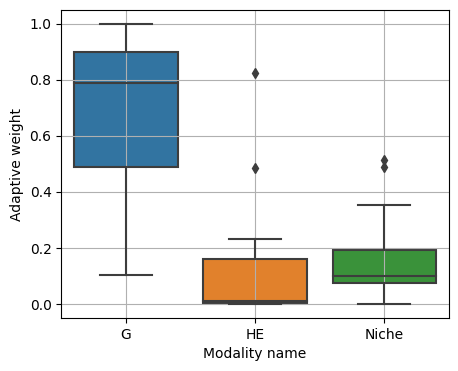

In [18]:
import seaborn as sns
fig,ax = plt.subplots(figsize=[5,4])
x_order = ['G','HE','Niche']
sns.boxplot(x="Modality name", y="Adaptive weight", data=dl_weight,ax=ax,order=x_order)

plt.grid()
plt.savefig('./figures/dlpfc_adaptive_weights.pdf')
